<a href="https://colab.research.google.com/github/ELmeehdi/2nd_project/blob/master/LSTM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
df = pd.read_csv('all_stocks_5yr.csv')

# Find the unique stock names/tickers in the 'Name' column
unique_stocks = df['Name'].unique()

# Count the number of unique stocks
num_stocks = len(unique_stocks)

# Display the result
print(f'Total number of unique stocks: {num_stocks}')


Total number of unique stocks: 505


Step 1: Preprocessing the Data

In [ ]:
# Ensure the Date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for the specific stock and the desired date range
stock_name = 'AAPL'  # Replace with the actual stock you're interested in
filtered_df = df[(df['Name'] == stock_name) & (df['date'] >= '2017-01-01') & (df['date'] <= '2018-07-02')]

# Select relevant columns (only 'close' as 'date' will be set as index)
data = filtered_df[['close']]

# Set Date as index
data.set_index(filtered_df['date'], inplace=True)

# Normalize the Close prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences of time steps
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the time step window (e.g., using the last 60 days to predict the next)
time_steps = 60

# Generate sequences from the scaled data
X, y = create_sequences(scaled_data, time_steps)

# Reshape the input data to 3D for LSTM model (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Check the shape of the data to ensure it's prepared for the LSTM model
print(f"Input data shape (X): {X.shape}")
print(f"Output data shape (y): {y.shape}")


Input data shape (X): (217, 60, 1)
Output data shape (y): (217,)


Step 2: Building the LSTM Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()

# Add LSTM layer with 50 units, return_sequences=True allows stacking multiple LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer (output layer with 1 unit for predicting stock price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.4152 - val_loss: 0.2490
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0778 - val_loss: 0.0751
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0469 - val_loss: 0.0099
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0163 - val_loss: 0.0379
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0203 - val_loss: 0.0144
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0116 - val_loss: 0.0062
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0106 - val_loss: 0.0118
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0118 - val_loss: 0.0062
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0120 - val_loss: 0.0065
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0101 - val_loss: 0.01

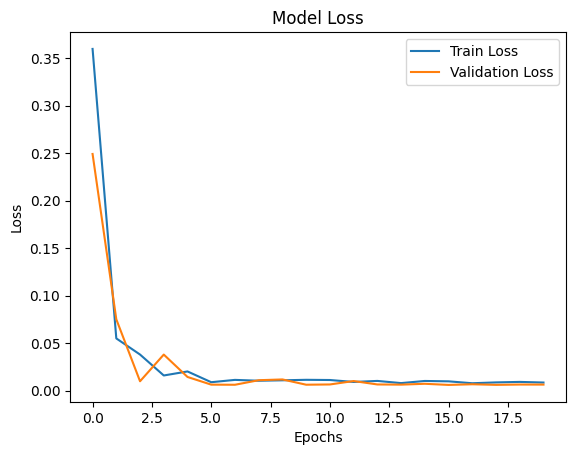

In [ ]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Check the loss history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Assume test_data is your test dataset that has been filtered similarly to the training data
test_data = filtered_df[['date', 'close']]
test_data.set_index('date', inplace=True)

# Normalize the test data using the same scaler used for training
scaled_test_data = scaler.transform(test_data)

# Create sequences for the test data
X_test, y_test = create_sequences(scaled_test_data, time_steps)

# Reshape for LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get the actual price values
predicted_prices_inverse = scaler.inverse_transform(predicted_prices)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
# Inverse transform the actual test values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(np.mean((predicted_prices_inverse - y_test_inverse) ** 2))
print(f"Model RMSE: {rmse}")

Model RMSE: 4.511851739600804


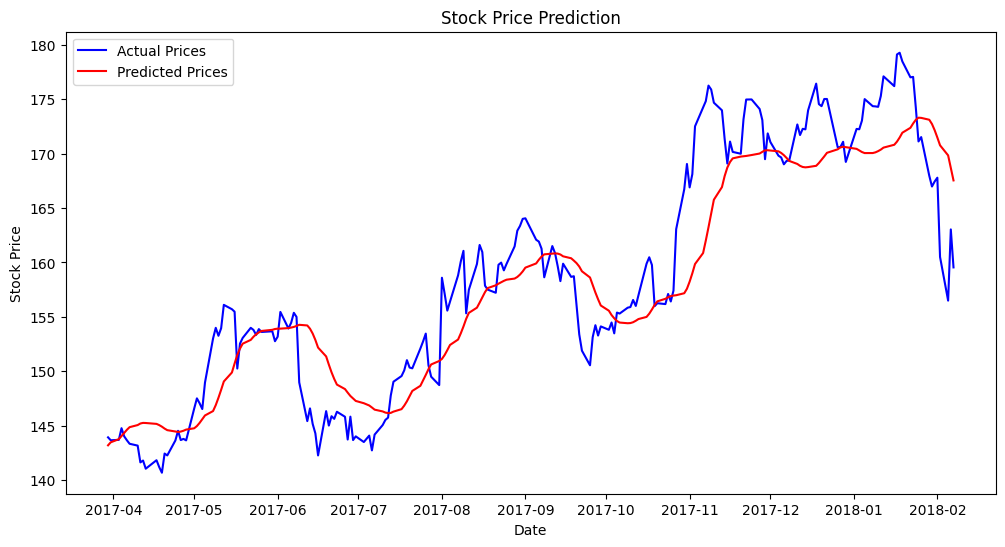

In [ ]:
# Prepare dates for plotting (make sure they match the length of y_test_inverse and predicted_prices_inverse)
test_dates = test_data.index[time_steps:len(y_test) + time_steps]

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inverse, color='blue', label='Actual Prices')
plt.plot(test_dates, predicted_prices_inverse, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()